In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso

In [3]:
df = pd.read_csv("scooter_battery_dataset.csv")

In [4]:
df.head()

,RideDistance_km,AvgSpeed_kmh,Temperature_C,RiderWeight_kg,BatteryDrop_Percent
0,3.315609,24.133434,29.050245,92.040096,37.240594
1,18.560729,21.635728,17.033039,52.824611,75.301062
2,8.400474,27.796227,29.889625,67.890617,43.447912
3,5.977655,22.754805,37.456333,74.899260,32.474854
4,1.517749,20.288545,25.829305,79.176380,29.603120


In [5]:
# Null value 
total = df.isna().sum()
print(total/df.shape[0]*100)

RideDistance_km        0.0
AvgSpeed_kmh           0.0
Temperature_C          0.0
RiderWeight_kg         0.0
BatteryDrop_Percent    0.0
dtype: float64


In [6]:
# duplicates
df.drop_duplicates().shape

(900, 5)

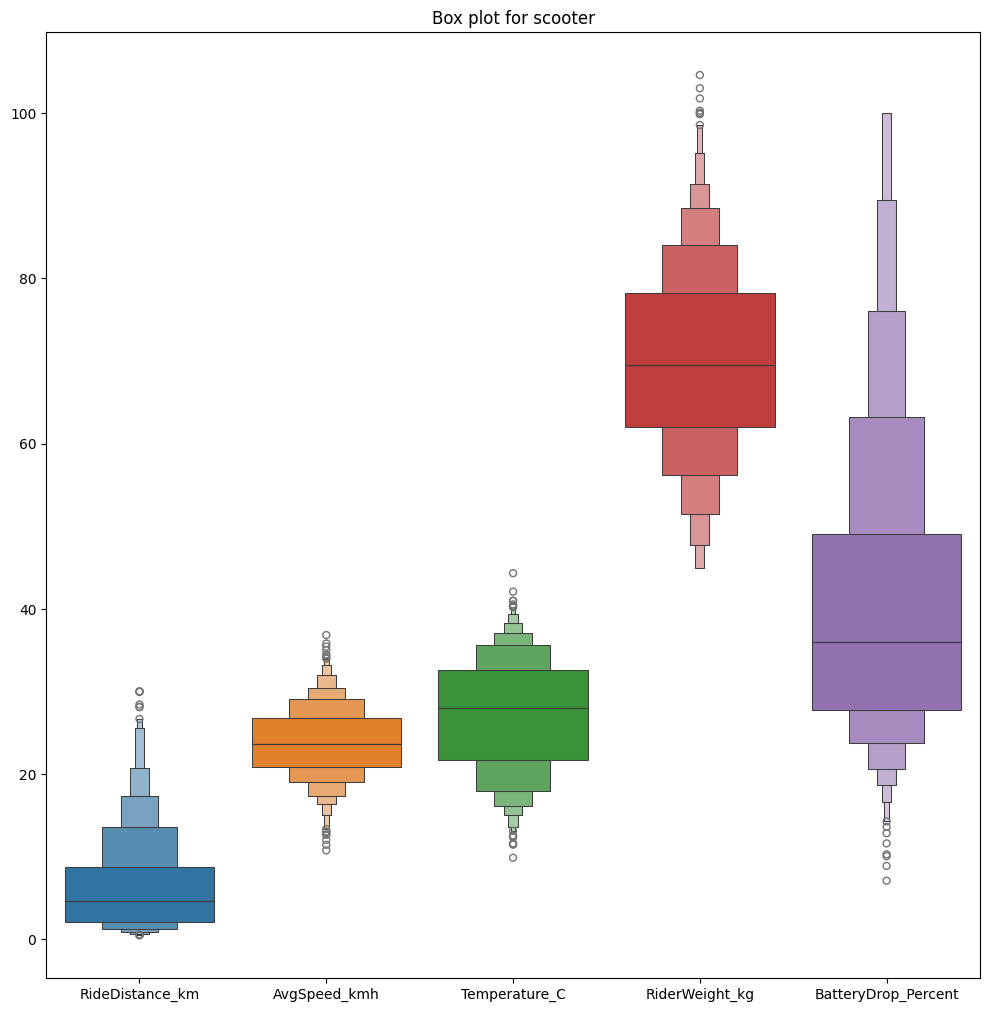

In [7]:
# outliers
plt.figure(figsize=(10,10))
sns.boxenplot(df)
plt.tight_layout()
plt.title("Box plot for scooter")
plt.show()

In [8]:
# Box Plot (IQR method)
# Q1 = df['col'].quantile(0.25) Q3 = df['col'].quantile(0.75) IQR = Q3 - Q1 df = df[(df['col'] >= Q1 - 1.5IQR) & (df['col'] <= Q3 + 1.5IQR)]

In [9]:
df.columns

Index(['RideDistance_km', 'AvgSpeed_kmh', 'Temperature_C', 'RiderWeight_kg',
       'BatteryDrop_Percent'],
      dtype='object')

In [10]:
Q1 = df["RideDistance_km"].quantile(0.25)
Q3 = df["RideDistance_km"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(lower,upper)

-7.964259055000003 18.801809463000005


In [11]:
Q1 = df["AvgSpeed_kmh"].quantile(0.25)
Q3 = df["AvgSpeed_kmh"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(lower,upper)

12.081304528749998 35.62494829875


In [12]:
def remove_outliers(columns: list):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        u_bound = Q3 + 1.5 * IQR
        l_bound = Q1 - 1.5 * IQR

        df.drop(df[(df[col] > u_bound) | (df[col] < l_bound)].index, inplace = True)

remove_outliers(df.columns)
df.shape

(840, 5)

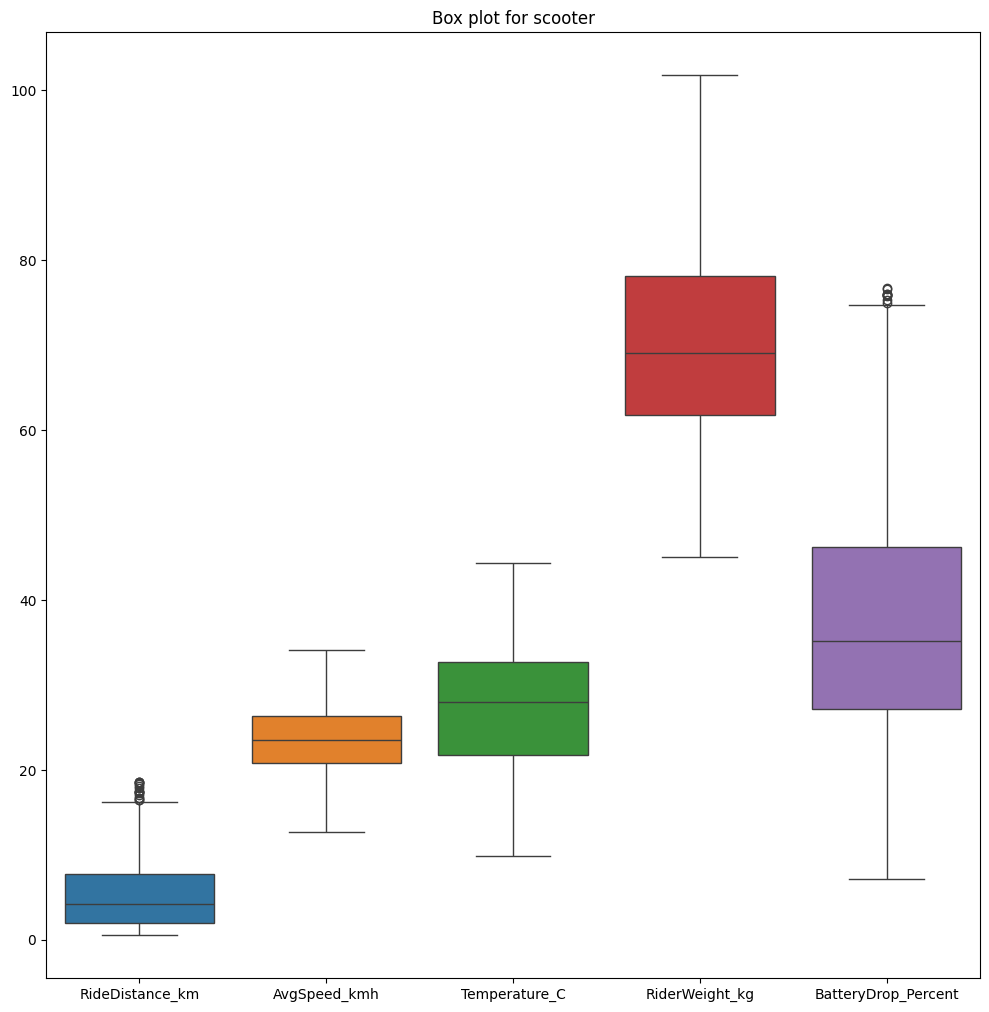

In [13]:
plt.figure(figsize=(10,10))
sns.boxplot(df)
plt.tight_layout()
plt.title("Box plot for scooter")
plt.show()

In [14]:
df.columns

Index(['RideDistance_km', 'AvgSpeed_kmh', 'Temperature_C', 'RiderWeight_kg',
       'BatteryDrop_Percent'],
      dtype='object')

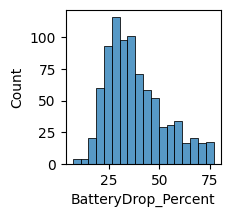

In [15]:
plt.figure(figsize=(2,2))
sns.histplot(df["BatteryDrop_Percent"])
plt.show()

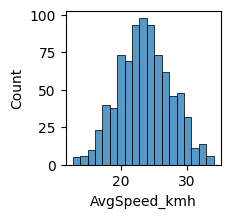

In [16]:
plt.figure(figsize=(2,2))
sns.histplot(df["AvgSpeed_kmh"])
plt.show()

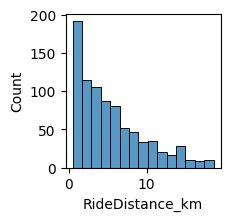

In [17]:
plt.figure(figsize=(2,2))
sns.histplot(df["RideDistance_km"])
plt.show()

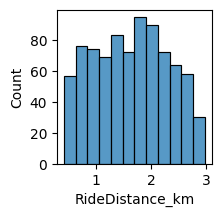

In [18]:
plt.figure(figsize=(2,2))
sns.histplot(np.log1p(df["RideDistance_km"]))
plt.show()


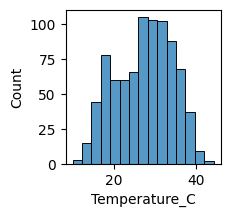

In [19]:
plt.figure(figsize=(2,2))
sns.histplot(df["Temperature_C"])
plt.show()

In [20]:
np.sqrt(df["RideDistance_km"])

0      1.820881
1      4.308216
2      2.898357
3      2.444924
4      1.231970
         ...   
894    2.667819
896    1.606736
897    3.754942
898    0.760607
899    1.017999
Name: RideDistance_km, Length: 840, dtype: float64

In [21]:
# skew
df.skew()

RideDistance_km        1.035043
AvgSpeed_kmh           0.030179
Temperature_C         -0.203413
RiderWeight_kg         0.077530
BatteryDrop_Percent    0.754840
dtype: float64

In [22]:
df.dtypes # no need of encoding

RideDistance_km        float64
AvgSpeed_kmh           float64
Temperature_C          float64
RiderWeight_kg         float64
BatteryDrop_Percent    float64
dtype: object

In [23]:
# scaling
sc = StandardScaler()
X = sc.fit_transform(df.drop("BatteryDrop_Percent",axis=1))

In [24]:
X

array([[-0.49218133,  0.12624158,  0.2455683 ,  1.8989261 ],
       [ 3.11371754, -0.49522505, -1.4988811 , -1.43146197],
       [ 0.71053214,  1.037599  ,  0.36741488, -0.15197642],
       ...,
       [ 2.05853344,  1.37210845,  0.15459959,  2.15642109],
       [-1.13957887, -2.72033384,  0.24044599, -0.61317625],
       [-1.03129638, -1.34506983, -0.90997895, -0.07506232]],
      shape=(840, 4))

In [25]:
Y = df["BatteryDrop_Percent"]

In [26]:
Y

0      37.240594
1      75.301062
2      43.447912
3      32.474854
4      29.603120
         ...    
894    34.435329
896    22.382981
897    74.017305
898    16.328793
899    19.713374
Name: BatteryDrop_Percent, Length: 840, dtype: float64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, random_state = 42)


In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
y_pred = lr.predict(X_test)


In [30]:
lr.score(X_test, y_test)


0.9326169222261973

In [31]:
np.mean((y_pred-y_test)**2)

np.float64(17.227057600587166)

In [32]:
df.columns

Index(['RideDistance_km', 'AvgSpeed_kmh', 'Temperature_C', 'RiderWeight_kg',
       'BatteryDrop_Percent'],
      dtype='object')

In [33]:
df.describe()

,RideDistance_km,AvgSpeed_kmh,Temperature_C,RiderWeight_kg,BatteryDrop_Percent
count,840.000000,840.000000,840.000000,840.000000,840.000000
mean,5.396467,23.626063,27.358568,69.680147,38.001377
std,4.230347,4.021446,6.892929,11.782065,14.219213
min,0.527857,12.681093,9.890303,45.000000,7.115052
25%,1.930430,20.781898,21.774482,61.715909,27.110183
50%,4.232659,23.534479,28.003467,69.077653,35.124731
75%,7.670131,26.355935,32.702558,78.123570,46.183101
max,18.560729,34.090955,44.329756,101.777728,76.746043


In [34]:
df.columns

Index(['RideDistance_km', 'AvgSpeed_kmh', 'Temperature_C', 'RiderWeight_kg',
       'BatteryDrop_Percent'],
      dtype='object')

In [35]:
RideDistance_km = input("RideDistance_km")
AvgSpeed_kmh = input("AvgSpeed_kmh")
Temperature_C = input("Temperature_C")
RiderWeight_kg = input("RiderWeight_kg")

In [36]:
inp = np.array([[RideDistance_km,AvgSpeed_kmh,Temperature_C,RiderWeight_kg]])
inp = sc.transform(inp)
lr.predict(inp)

C:\Users\Welcome\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([35.37759057])

<Axes: xlabel='BatteryDrop_Percent'>

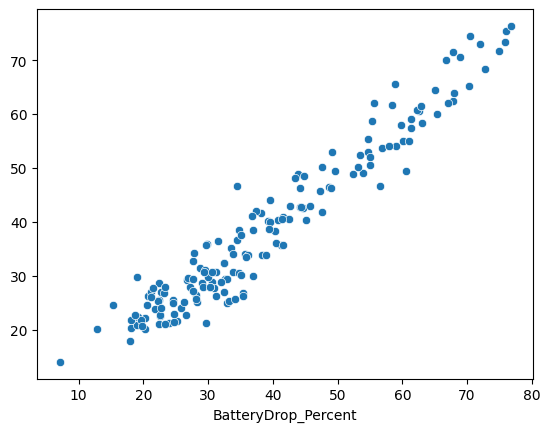

In [37]:
sns.scatterplot(x = y_test, y = y_pred)


In [39]:
import pickle as pk

In [40]:
model_to_save = {'feature_names': ["RideDistance_km","AvgSpeed_kmh","Temperature_C","RiderWeight_kg"],"model":lr}

In [41]:
with open("lr_model.pkl","wb") as file:
    pk.dump(lr,file)
with open("lr_model.pkl","rb") as file:
    new_lr = pk.load(file)

In [43]:
new_lr.predict(inp)

array([35.37759057])

In [65]:
inp2 = np.array((10,20,20,50))

In [66]:
inp2

array([10, 20, 20, 50])

In [55]:
lr.predict([inp2])

array([308.92192243])

In [67]:
inp2 = sc.transform([inp2])
lr.predict(inp2)

C:\Users\Welcome\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([47.05314481])

In [ ]:
scaler = StandardScaler()

with open("NEWscaler.pkl", "wb") as f:
    pickle.dump(sc, f)

with open("NEWlr_model.pkl", "wb") as f:
    pickle.dump(lr, f)
